<a href="https://colab.research.google.com/github/061095/biblioteca_pandas_/blob/main/Desafio_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Contexto**

Você trabalha em uma plataforma de streaming e a diretoria está preocupada com o
alto índice de usuários cancelando as suas assinaturas. Eles acreditam que é possível
prever se um usuário tem mais chance de deixar a plataforma antes que isso aconteça,
e com base nessa informação tomar ações para reduzir o churn.
Seu objetivo é criar um modelo de classificação capaz de prever se um usuário tem
mais chance de cancelar a sua assinatura na plataforma ou não. Para isso, a empresa
forneceu uma base de dados em csv contendo dados sobre as contas dos clientes.

# Etapa 01- Análise exploratória dos dados

In [209]:
pip install --upgrade scikit-learn

In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [137]:
df= pd.read_csv("/content/streaming_data (5).csv")
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [138]:
df.dtypes

Age                       float64
Gender                     object
Time_on_platform          float64
Devices_connected         float64
Subscription_type          object
Num_streaming_services    float64
Num_active_profiles         int64
Avg_rating                float64
Churned                   float64
User_id                    object
dtype: object

In [139]:
df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [140]:
df.isna().count()

Age                       77884
Gender                    77884
Time_on_platform          77884
Devices_connected         77884
Subscription_type         77884
Num_streaming_services    77884
Num_active_profiles       77884
Avg_rating                77884
Churned                   77884
User_id                   77884
dtype: int64

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [142]:
df['Churned'] = df['Churned'].replace({0.0: 'no', 1.0: 'yes'})
df.head

<bound method NDFrame.head of         Age  Gender  Time_on_platform  Devices_connected Subscription_type  \
0      49.0    Male            4700.0                3.0             Basic   
1      69.0  Female            6107.0                2.0          Standard   
2      44.0    Male            6374.0                3.0           Premium   
3      26.0    Male               NaN                5.0             Basic   
4      18.0     NaN            1948.0                3.0             Basic   
...     ...     ...               ...                ...               ...   
77879  45.0    Male               NaN                NaN             Basic   
77880  47.0  Female            6176.0                NaN           Premium   
77881  64.0  Female               NaN                5.0           Premium   
77882  58.0    Male            1314.0                5.0          Standard   
77883  68.0  Female            7078.0                1.0          Standard   

       Num_streaming_services  Nu

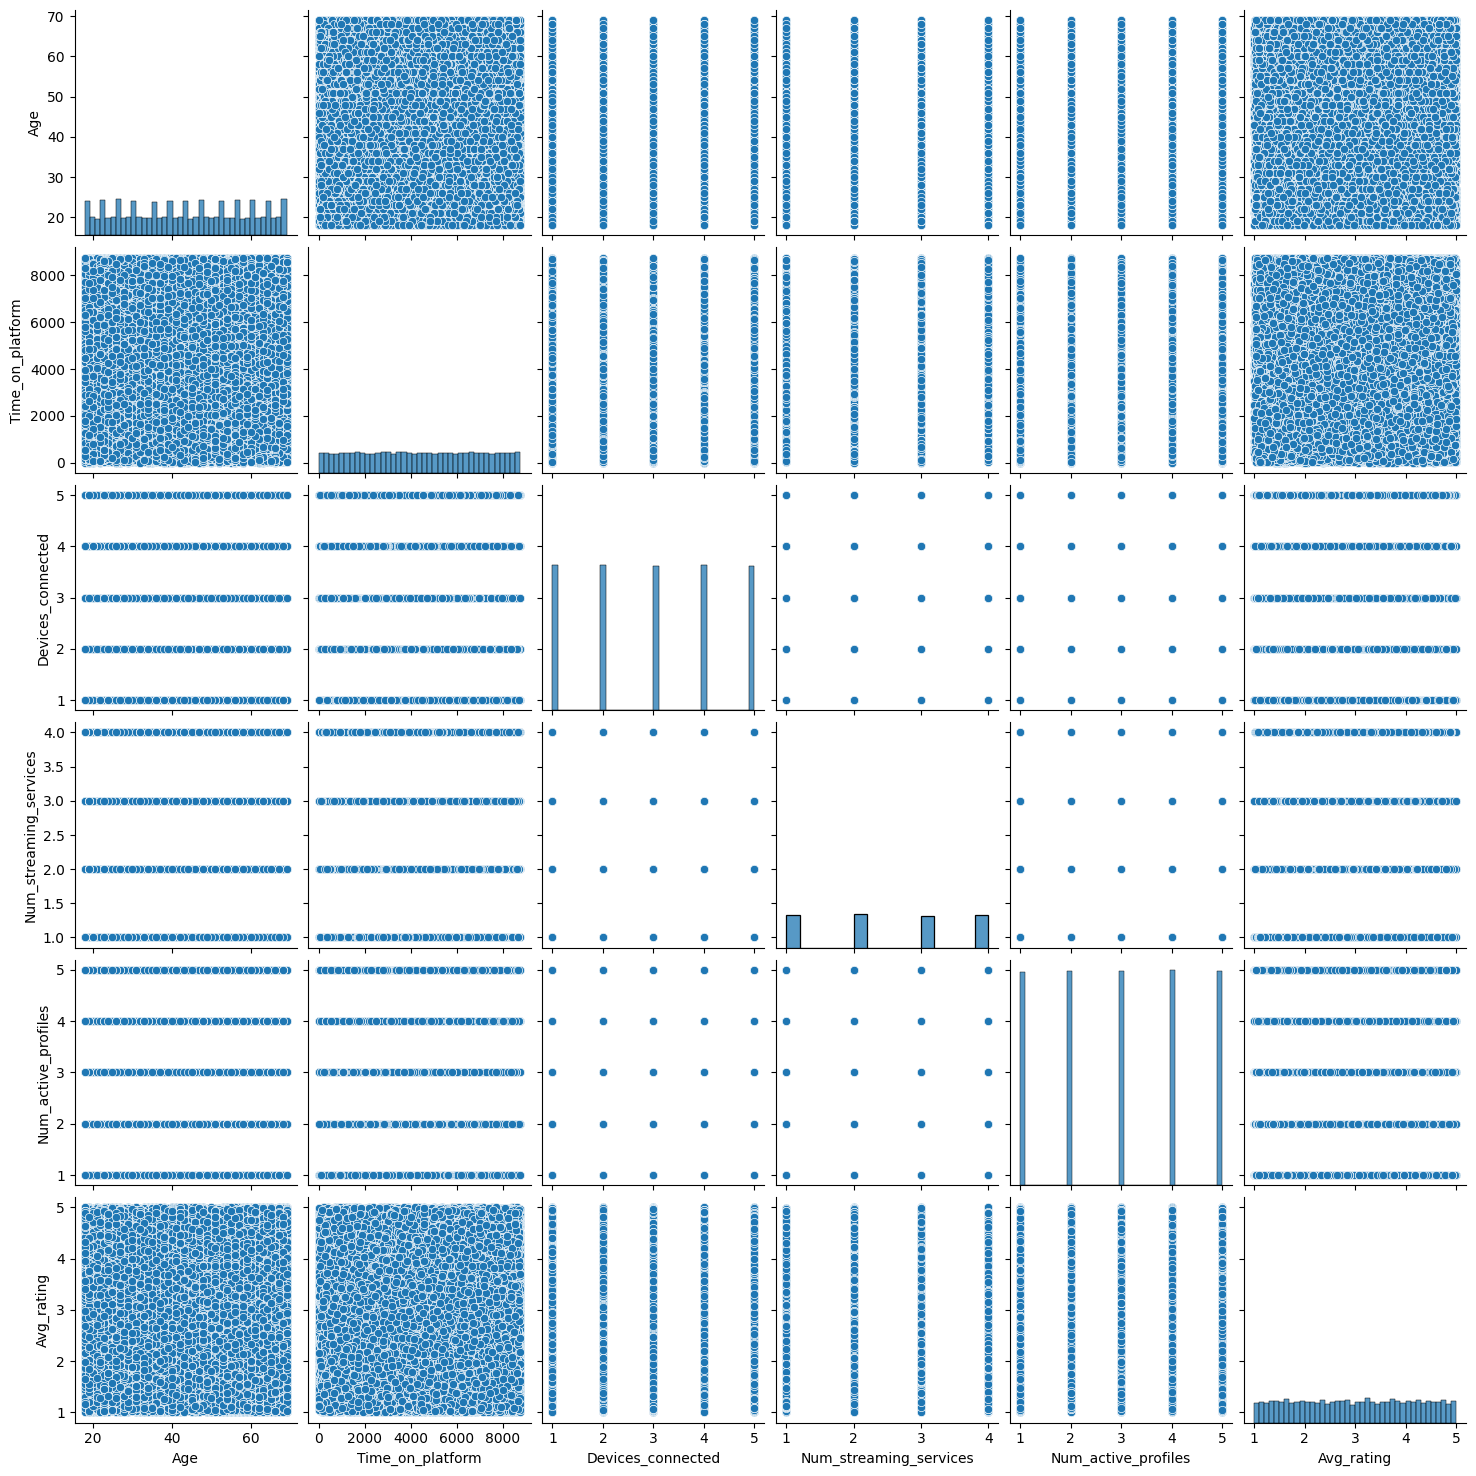

In [143]:
sns.pairplot(df)

<ipython-input-144-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

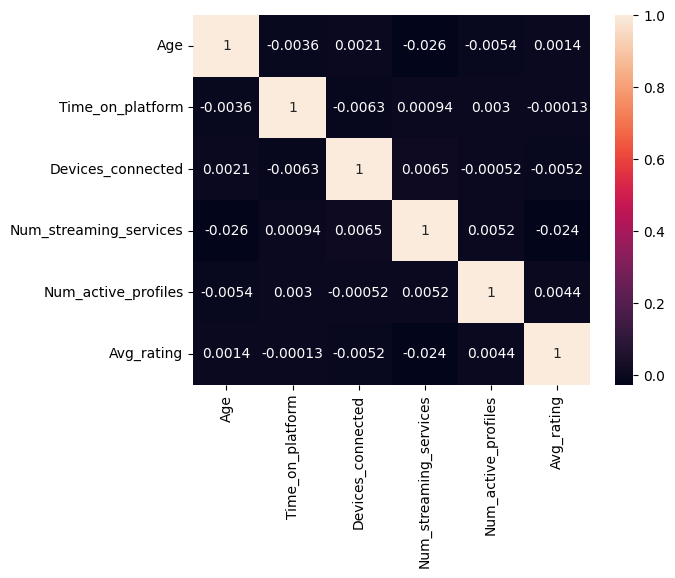

In [144]:
sns.heatmap(df.corr(), annot=True)

# Etapa 02 -Tratamento dos Dados (Data Preparation)


In [145]:
churn_agg= df.groupby("Churned")["User_id"].count().reset_index
churn_agg ()

,Churned,User_id
0,no,46285
1,yes,14863


In [146]:
df= df.dropna()

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1431 entries, 2 to 77804
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1431 non-null   float64
 1   Gender                  1431 non-null   object 
 2   Time_on_platform        1431 non-null   float64
 3   Devices_connected       1431 non-null   float64
 4   Subscription_type       1431 non-null   object 
 5   Num_streaming_services  1431 non-null   float64
 6   Num_active_profiles     1431 non-null   int64  
 7   Avg_rating              1431 non-null   float64
 8   Churned                 1431 non-null   object 
 9   User_id                 1431 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 123.0+ KB


In [148]:
df.duplicated()

2        False
22       False
25       False
49       False
59       False
         ...  
77670     True
77684     True
77693     True
77785     True
77804     True
Length: 1431, dtype: bool

In [149]:
df.duplicated().sum().any()

True

In [150]:
df.fillna({'UnitPrice': 0}).tail()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
77670,51.0,Male,5343.0,1.0,Premium,4.0,5,2.24,no,4488936d-fe09-48c2-9ffa-3bafe5bf9054
77684,48.0,Male,3716.0,2.0,Standard,1.0,4,2.85,yes,ce67ed9b-9f38-42bb-a5bd-5878f03214a4
77693,38.0,Female,2799.0,2.0,Standard,3.0,2,4.17,no,c24fe26d-a2c8-48f7-ab69-2f9b2048f5c0
77785,19.0,Male,4856.0,1.0,Premium,2.0,5,2.62,no,05e7d3d6-db8d-4134-961f-8481ae3052d3
77804,38.0,Female,4908.0,3.0,Premium,3.0,1,4.19,yes,e08b2484-8728-4410-8de0-1201233f6522


In [151]:
churn_agg= df.groupby("Churned")["User_id"].count().reset_index
churn_agg

<bound method Series.reset_index of Churned
no     1057
yes     374
Name: User_id, dtype: int64>

In [152]:
df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating
count,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000
mean,43.101328,4444.849755,3.011880,2.481481,2.997205,3.067680
std,15.068290,2477.319063,1.384933,1.099669,1.445027,1.152811
min,18.000000,2.000000,1.000000,1.000000,1.000000,1.000000
25%,30.000000,2308.000000,2.000000,2.000000,2.000000,2.100000
50%,43.000000,4444.000000,3.000000,2.000000,3.000000,3.100000
75%,56.000000,6593.000000,4.000000,3.000000,4.000000,4.070000
max,69.000000,8755.000000,5.000000,4.000000,5.000000,4.990000


In [153]:
df.head

<bound method NDFrame.head of         Age  Gender  Time_on_platform  Devices_connected Subscription_type  \
2      44.0    Male            6374.0                3.0           Premium   
22     49.0  Female            1015.0                1.0          Standard   
25     63.0  Female             249.0                2.0          Standard   
49     69.0  Female            8655.0                2.0           Premium   
59     47.0    Male             280.0                1.0          Standard   
...     ...     ...               ...                ...               ...   
77670  51.0    Male            5343.0                1.0           Premium   
77684  48.0    Male            3716.0                2.0          Standard   
77693  38.0  Female            2799.0                2.0          Standard   
77785  19.0    Male            4856.0                1.0           Premium   
77804  38.0  Female            4908.0                3.0           Premium   

       Num_streaming_services  Nu

In [154]:
df.isna().count()

Age                       1431
Gender                    1431
Time_on_platform          1431
Devices_connected         1431
Subscription_type         1431
Num_streaming_services    1431
Num_active_profiles       1431
Avg_rating                1431
Churned                   1431
User_id                   1431
dtype: int64

In [155]:
df.dropna(inplace=True)

<ipython-input-155-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [156]:
df.dtypes

Age                       float64
Gender                     object
Time_on_platform          float64
Devices_connected         float64
Subscription_type          object
Num_streaming_services    float64
Num_active_profiles         int64
Avg_rating                float64
Churned                    object
User_id                    object
dtype: object

In [157]:
churn_agg = df.groupby("Churned")["User_id"].count().reset_index()
churn_agg

,Churned,User_id
0,no,1057
1,yes,374


<Figure size 1000x800 with 0 Axes>

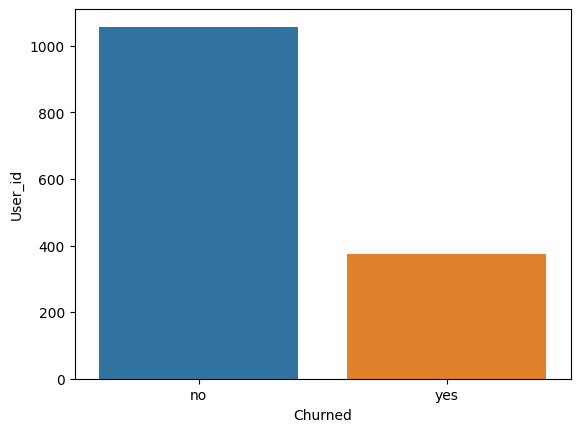

<Figure size 1000x800 with 0 Axes>

In [158]:
sns.barplot(data=churn_agg, x="Churned", y="User_id")
plt.figure(figsize=[10,8])

In [159]:
churn_sub = df.groupby("Subscription_type")["User_id"].count().reset_index()
churn_sub

,Subscription_type,User_id
0,Basic,441
1,Premium,521
2,Standard,469


<Figure size 1000x800 with 0 Axes>

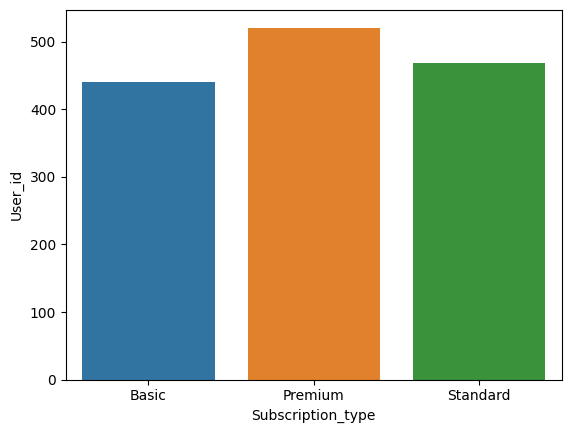

<Figure size 1000x800 with 0 Axes>

In [160]:
sns.barplot(data=churn_sub, x="Subscription_type", y="User_id")
plt.figure(figsize=[10,8])

In [161]:
churn_gen= df.groupby("Gender")["User_id"].count().reset_index()
churn_gen

,Gender,User_id
0,Female,735
1,Male,696


<Figure size 1000x800 with 0 Axes>

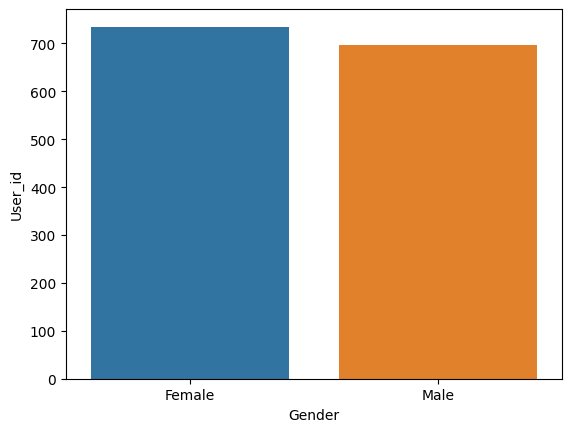

<Figure size 1000x800 with 0 Axes>

In [162]:
sns.barplot(data=churn_gen, x="Gender", y="User_id")
plt.figure(figsize=[10,8])

In [163]:
df.dtypes

Age                       float64
Gender                     object
Time_on_platform          float64
Devices_connected         float64
Subscription_type          object
Num_streaming_services    float64
Num_active_profiles         int64
Avg_rating                float64
Churned                    object
User_id                    object
dtype: object

In [164]:
x= df.drop(["User_id","Churned"], axis=1)
y=df[["Churned"]]

In [165]:
y

,Churned
2,yes
22,yes
25,no
49,yes
59,no
...,...
77670,no
77684,yes
77693,no
77785,no


In [166]:
df.dropna(axis = 0)

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,yes,0283dffd-6684-4a05-9c6f-c02098a6849d
22,49.0,Female,1015.0,1.0,Standard,2.0,1,3.90,yes,6d7cda84-d34e-4756-9849-66824c41d195
25,63.0,Female,249.0,2.0,Standard,4.0,5,2.29,no,44879a07-a820-4316-a6d1-ddc14c9b8ab1
49,69.0,Female,8655.0,2.0,Premium,3.0,5,3.45,yes,216d81d7-f6eb-405f-bf16-a8303357db76
59,47.0,Male,280.0,1.0,Standard,3.0,2,3.04,no,1e6bc717-4037-4acc-b1b7-a45055036ee4
...,...,...,...,...,...,...,...,...,...,...
77670,51.0,Male,5343.0,1.0,Premium,4.0,5,2.24,no,4488936d-fe09-48c2-9ffa-3bafe5bf9054
77684,48.0,Male,3716.0,2.0,Standard,1.0,4,2.85,yes,ce67ed9b-9f38-42bb-a5bd-5878f03214a4
77693,38.0,Female,2799.0,2.0,Standard,3.0,2,4.17,no,c24fe26d-a2c8-48f7-ab69-2f9b2048f5c0
77785,19.0,Male,4856.0,1.0,Premium,2.0,5,2.62,no,05e7d3d6-db8d-4134-961f-8481ae3052d3


In [167]:
y

,Churned
2,yes
22,yes
25,no
49,yes
59,no
...,...
77670,no
77684,yes
77693,no
77785,no


In [168]:
df.dropna(axis = 1)

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,yes,0283dffd-6684-4a05-9c6f-c02098a6849d
22,49.0,Female,1015.0,1.0,Standard,2.0,1,3.90,yes,6d7cda84-d34e-4756-9849-66824c41d195
25,63.0,Female,249.0,2.0,Standard,4.0,5,2.29,no,44879a07-a820-4316-a6d1-ddc14c9b8ab1
49,69.0,Female,8655.0,2.0,Premium,3.0,5,3.45,yes,216d81d7-f6eb-405f-bf16-a8303357db76
59,47.0,Male,280.0,1.0,Standard,3.0,2,3.04,no,1e6bc717-4037-4acc-b1b7-a45055036ee4
...,...,...,...,...,...,...,...,...,...,...
77670,51.0,Male,5343.0,1.0,Premium,4.0,5,2.24,no,4488936d-fe09-48c2-9ffa-3bafe5bf9054
77684,48.0,Male,3716.0,2.0,Standard,1.0,4,2.85,yes,ce67ed9b-9f38-42bb-a5bd-5878f03214a4
77693,38.0,Female,2799.0,2.0,Standard,3.0,2,4.17,no,c24fe26d-a2c8-48f7-ab69-2f9b2048f5c0
77785,19.0,Male,4856.0,1.0,Premium,2.0,5,2.62,no,05e7d3d6-db8d-4134-961f-8481ae3052d3


In [169]:
y

,Churned
2,yes
22,yes
25,no
49,yes
59,no
...,...
77670,no
77684,yes
77693,no
77785,no


In [170]:
df.fillna(value=0)

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,yes,0283dffd-6684-4a05-9c6f-c02098a6849d
22,49.0,Female,1015.0,1.0,Standard,2.0,1,3.90,yes,6d7cda84-d34e-4756-9849-66824c41d195
25,63.0,Female,249.0,2.0,Standard,4.0,5,2.29,no,44879a07-a820-4316-a6d1-ddc14c9b8ab1
49,69.0,Female,8655.0,2.0,Premium,3.0,5,3.45,yes,216d81d7-f6eb-405f-bf16-a8303357db76
59,47.0,Male,280.0,1.0,Standard,3.0,2,3.04,no,1e6bc717-4037-4acc-b1b7-a45055036ee4
...,...,...,...,...,...,...,...,...,...,...
77670,51.0,Male,5343.0,1.0,Premium,4.0,5,2.24,no,4488936d-fe09-48c2-9ffa-3bafe5bf9054
77684,48.0,Male,3716.0,2.0,Standard,1.0,4,2.85,yes,ce67ed9b-9f38-42bb-a5bd-5878f03214a4
77693,38.0,Female,2799.0,2.0,Standard,3.0,2,4.17,no,c24fe26d-a2c8-48f7-ab69-2f9b2048f5c0
77785,19.0,Male,4856.0,1.0,Premium,2.0,5,2.62,no,05e7d3d6-db8d-4134-961f-8481ae3052d3


In [171]:
df.fillna(axis=1, method='ffill')

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,yes,0283dffd-6684-4a05-9c6f-c02098a6849d
22,49.0,Female,1015.0,1.0,Standard,2.0,1,3.9,yes,6d7cda84-d34e-4756-9849-66824c41d195
25,63.0,Female,249.0,2.0,Standard,4.0,5,2.29,no,44879a07-a820-4316-a6d1-ddc14c9b8ab1
49,69.0,Female,8655.0,2.0,Premium,3.0,5,3.45,yes,216d81d7-f6eb-405f-bf16-a8303357db76
59,47.0,Male,280.0,1.0,Standard,3.0,2,3.04,no,1e6bc717-4037-4acc-b1b7-a45055036ee4
...,...,...,...,...,...,...,...,...,...,...
77670,51.0,Male,5343.0,1.0,Premium,4.0,5,2.24,no,4488936d-fe09-48c2-9ffa-3bafe5bf9054
77684,48.0,Male,3716.0,2.0,Standard,1.0,4,2.85,yes,ce67ed9b-9f38-42bb-a5bd-5878f03214a4
77693,38.0,Female,2799.0,2.0,Standard,3.0,2,4.17,no,c24fe26d-a2c8-48f7-ab69-2f9b2048f5c0
77785,19.0,Male,4856.0,1.0,Premium,2.0,5,2.62,no,05e7d3d6-db8d-4134-961f-8481ae3052d3


In [172]:
y

,Churned
2,yes
22,yes
25,no
49,yes
59,no
...,...
77670,no
77684,yes
77693,no
77785,no


# Etapa 03- Modelagem dos Dados - Regressão Logística


In [173]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(["Churned"])


LabelEncoder()

In [174]:
y=Churned=le.fit_transform(y.Churned)

In [175]:
x= pd.get_dummies(x)

In [176]:
from sklearn.preprocessing import MinMaxScaler
mm= MinMaxScaler ()
x=pd.DataFrame(mm.fit_transform(x))

In [177]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.25)

In [178]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
lr=model.fit(x_train, y_train)

In [179]:
lr.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [180]:
x_test.assign(Churned=y_test).assign(label=lr.predict(x_test))

,0,1,2,3,4,5,6,7,8,9,10,Churned,label
1405,0.549020,0.800983,0.25,0.333333,0.75,0.010025,1.0,0.0,1.0,0.0,0.0,0,0
623,0.470588,0.009025,0.50,0.333333,0.25,0.060150,0.0,1.0,0.0,0.0,1.0,0,0
749,0.274510,0.695076,0.25,0.666667,1.00,0.127820,0.0,1.0,0.0,1.0,0.0,0,0
1162,0.823529,0.061465,1.00,0.333333,1.00,0.411028,0.0,1.0,1.0,0.0,0.0,0,0
1166,0.176471,0.491831,1.00,0.333333,0.00,0.215539,1.0,0.0,1.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,0.313725,0.200503,0.00,0.666667,0.00,0.759398,0.0,1.0,0.0,0.0,1.0,0,0
583,0.882353,0.396207,0.25,0.333333,0.50,0.443609,1.0,0.0,0.0,1.0,0.0,0,0
1114,0.980392,0.396207,0.50,0.333333,0.50,0.736842,0.0,1.0,0.0,0.0,1.0,0,0
79,0.411765,0.637953,0.75,0.666667,1.00,0.536341,1.0,0.0,0.0,1.0,0.0,0,0


# Etapa 04 -Modelagem dos Dados - Tunning


In [181]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(x_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(x_test))}")

print(f"Acurácia Balanceada(Treino): {balanced_accuracy_score(y_train, lr.predict(x_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(x_test))}")

print(f"Precision (Treino): {precision_score(y_train, lr.predict(x_train))}")
print(f"Precision (Teste): {precision_score(y_test, lr.predict(x_test))}")

print(f"Recall (Treino): {recall_score(y_train, lr.predict(x_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr.predict(x_test))}")

print(f"F1-Score (Treino): {f1_score(y_train, lr.predict(x_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, lr.predict(x_test))}")

print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr.predict_proba(x_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr.predict_proba(x_test)[:,1])}")


Acurácia (Treino): 0.7306616961789375
Acurácia (Teste): 0.7625698324022346
Acurácia Balanceada(Treino): 0.5
Acurácia Balanceada (Teste): 0.5
Precision (Treino): 0.0
Precision (Teste): 0.0
Recall (Treino): 0.0
Recall (Teste): 0.0
F1-Score (Treino): 0.0
F1-Score (Teste): 0.0
ROCAUC (Treino): 0.5591104088694301
ROCAUC (Teste): 0.594311570782159


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  F-score that is not between precision and recall.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  F-score that is not between precision and recall.


In [207]:
lr.fit(x_train, y_train)

LogisticRegression()

In [202]:
lr.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [201]:
x_test.assign(churn = y_test).assign(label = lr.predict(x_test))

,0,1,2,3,4,5,6,7,8,9,10,churn,label
1405,0.549020,0.800983,0.25,0.333333,0.75,0.010025,1.0,0.0,1.0,0.0,0.0,0,0
623,0.470588,0.009025,0.50,0.333333,0.25,0.060150,0.0,1.0,0.0,0.0,1.0,0,0
749,0.274510,0.695076,0.25,0.666667,1.00,0.127820,0.0,1.0,0.0,1.0,0.0,0,0
1162,0.823529,0.061465,1.00,0.333333,1.00,0.411028,0.0,1.0,1.0,0.0,0.0,0,0
1166,0.176471,0.491831,1.00,0.333333,0.00,0.215539,1.0,0.0,1.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,0.313725,0.200503,0.00,0.666667,0.00,0.759398,0.0,1.0,0.0,0.0,1.0,0,0
583,0.882353,0.396207,0.25,0.333333,0.50,0.443609,1.0,0.0,0.0,1.0,0.0,0,0
1114,0.980392,0.396207,0.50,0.333333,0.50,0.736842,0.0,1.0,0.0,0.0,1.0,0,0
79,0.411765,0.637953,0.75,0.666667,1.00,0.536341,1.0,0.0,0.0,1.0,0.0,0,0


In [193]:
!pip install matplotlib-venn

In [200]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(x_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(x_test))}")

print(f"Acurácia Balanceada(Treino): {balanced_accuracy_score(y_train, lr.predict(x_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(x_test))}")

print(f"Precision (Treino): {precision_score(y_train, lr.predict(x_train))}")
print(f"Precision (Teste): {precision_score(y_test, lr.predict(x_test))}")

print(f"Recall (Treino): {recall_score(y_train, lr.predict(x_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr.predict(x_test))}")

print(f"F1-Score (Treino): {f1_score(y_train, lr.predict(x_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, lr.predict(x_test))}")

print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr.predict_proba(x_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr.predict_proba(x_test)[:,1])}")


Acurácia (Treino): 0.7306616961789375
Acurácia (Teste): 0.7625698324022346
Acurácia Balanceada(Treino): 0.5
Acurácia Balanceada (Teste): 0.5
Precision (Treino): 0.0
Precision (Teste): 0.0
Recall (Treino): 0.0
Recall (Teste): 0.0
F1-Score (Treino): 0.0
F1-Score (Teste): 0.0
ROCAUC (Treino): 0.5591104088694301
ROCAUC (Teste): 0.594311570782159


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  F-score that is not between precision and recall.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  F-score that is not between precision and recall.


# Etapa 05 -Modelagem dos Dados - Random Forest


In [ ]:
pip install --upgrade scikit-learn

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

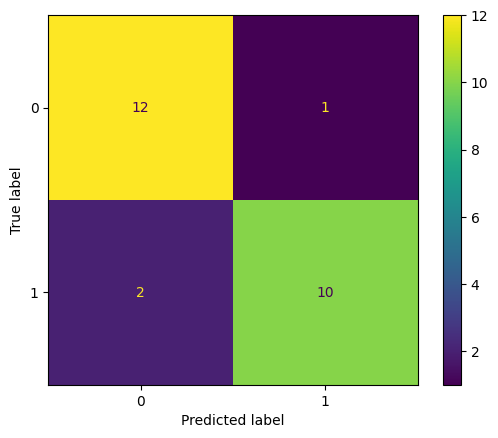

In [203]:
x, y = make_classification(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x , y, random_state=0)
clf = SVC(random_state=0)
clf.fit(x_train, y_train)
SVC(random_state=0)
ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test)

In [205]:
from sklearn.metrics import classification_report

In [206]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>